In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

import os


In [3]:
os.makedirs("outputs", exist_ok=True)
os.makedirs("reports", exist_ok=True)


In [5]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df = df[
    ["survived", "sex", "age", "fare", "embarked", "pclass"]
]

df.head()


,survived,sex,age,fare,embarked,pclass
0,0,male,22.0,7.2500,S,3
1,1,female,38.0,71.2833,C,1
2,1,female,26.0,7.9250,S,3
3,1,female,35.0,53.1000,S,1
4,0,male,35.0,8.0500,S,3


In [13]:
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-1032788824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)


,0
survived,0
sex,0
age,0
fare,0
embarked,0
pclass,0


In [15]:
X = df.drop("survived", axis=1)
y = df["survived"]

print(y.value_counts(normalize=True))


survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [17]:
numeric_features = ["age", "fare"]
categorical_features = ["sex", "embarked", "pclass"]

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [21]:
model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'embarked',
                                                   'pclass'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [23]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.770949720670391, 0.71875, 0.6666666666666666, 0.6917293233082706)

In [25]:
with open("reports/metrics.txt", "w") as f:
    f.write(f"Accuracy : {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"Recall   : {recall}\n")
    f.write(f"F1-score : {f1}\n")


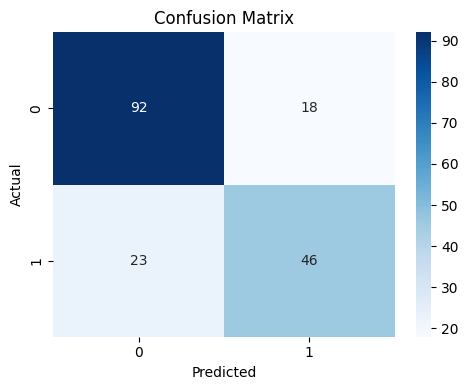

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.savefig("outputs/confusion_matrix.png")
plt.show()


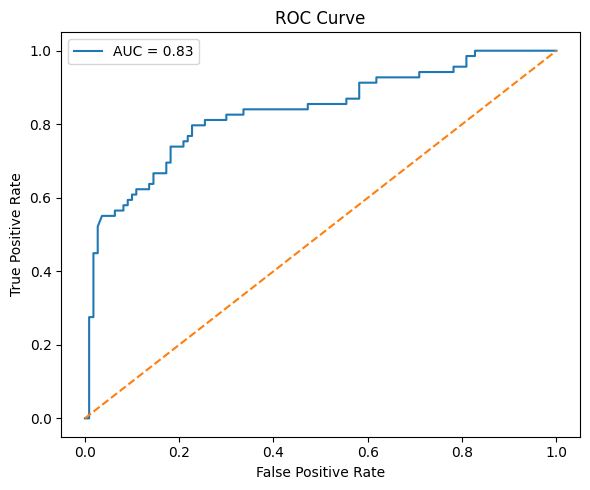

In [29]:
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()

plt.savefig("outputs/roc_curve.png")
plt.show()


In [31]:
pred_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

pred_df.to_csv("outputs/predictions.csv", index=False)


In [32]:
report = f"""
Logistic Regression – Titanic Survival Prediction

Model: Logistic Regression
Dataset: Titanic (Seaborn)

Evaluation Metrics:
Accuracy : {accuracy}
Precision: {precision}
Recall   : {recall}
F1-score : {f1}
AUC      : {roc_auc}

Conclusion:
The model effectively classifies survival outcomes and balances
precision and recall, making it suitable for binary classification tasks.
"""

with open("reports/final_report.txt", "w") as f:
    f.write(report)
